# 3-Climate Analysis and Exploration

In [141]:
# you are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.
# Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exporation.
# Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
# Use SQLAlchemy create_engine to connect to your sqlite database.
# Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

# Precipitation Analysis
# Design a query to retrieve the last 12 months of precipitation data.
# Select only the date and prcp values.
# Load the query results into a Pandas DataFrame and set the index to the date column.
# Plot the results using the DataFrame plot method.

In [142]:
# Import SQLAlchemy and dependencies
# Python SQL toolkit and ORM
import sqlalchemy
from sqlalchemy import create_engine, MetaData, inspect, func
# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base
# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Numeric, Text, Float
import pandas as pd
# PyMySQL 
import pymysql
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

In [143]:
# Create engine using the `hawaii.sqlite` database file 
engine = create_engine("sqlite:///hawaii.sqlite")

In [144]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [145]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [146]:
# Print all of the classes mapped 
Base.classes.keys()

['measurements', 'station']

In [147]:
# Use `engine.execute` to select and display the first 10 rows from the table
engine.execute('SELECT * FROM measurements LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-06', 0.0, 73),
 (6, 'USC00519397', '2010-01-07', 0.06, 70),
 (7, 'USC00519397', '2010-01-08', 0.0, 64),
 (8, 'USC00519397', '2010-01-09', 0.0, 68),
 (9, 'USC00519397', '2010-01-10', 0.0, 73),
 (10, 'USC00519397', '2010-01-11', 0.01, 64)]

In [148]:
# Reflect Database into ORM class
Station = Base.classes.station
Measurements = Base.classes.measurements

In [149]:
# Start session
session = Session(engine)

In [150]:
#Precipitation Analysis
#Design a query to retrieve the last 12 months of precipitation data.
#Select only the date and prcp values.
#Load the query results into a Pandas DataFrame and set the index to the date column.
#Plot the results using the DataFrame plot method.

In [151]:
# query last date
last_date = dt.date(2017,8,23)
print (last_date)

2017-08-23


In [152]:
# query last 12 months of data
last_12months = dt.date(2017,8,23) - dt.timedelta(days=365)
print (last_12months)

2016-08-23


In [153]:
rain_data = session.query(Measurements.date, Measurements.prcp).\
filter(Measurements.date > last_12months).\
order_by(Measurements.date).all()


In [154]:
# load data into dataframe w/ index to the date
rain_data_df = pd.DataFrame(rain_data)
rain_data_df.set_index("date").head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,0.00
2016-08-24,1.22


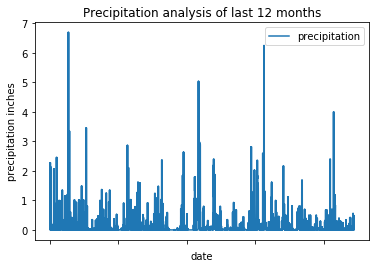

In [155]:
#plot 12 months of data into a graph
rain_data_df.plot("date","prcp")
plt.xlabel("date")
plt.ylabel("precipitation inches")
plt.title ("Precipitation analysis of last 12 months")
plt.legend(["precipitation"])
plt.show()
#save the chart
plt.savefig("precipitation_analysis_12months.png")

In [184]:
# Station Analysis
# Design a query to calculate the total number of stations.
# Design a query to find the most active stations.
# List the stations and observation counts in descending order
# Which station has the highest number of observations?
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.
# Plot the results as a histogram with bins=12.

In [185]:
# count stations
locations = session.query(Measurements).group_by(Measurements.station).count()
print("there are {} stations".format(locations))

there are 9 stations


In [186]:
# most active station (tobs)
most_active_stations = session.query(Measurements.station, func.count(Measurements.tobs)).group_by(Measurements.station).order_by(func.count(Measurements.tobs).desc()).all()
print("busiest stations are",most_active_stations)

busiest stations are [('USC00519281', 5544), ('USC00519397', 5448), ('USC00513117', 5418), ('USC00519523', 5338), ('USC00516128', 5224), ('USC00514830', 4404), ('USC00511918', 3958), ('USC00517948', 2744), ('USC00518838', 1022)]


In [187]:
most_active_station = session.query(Measurements.station, func.count(Measurements.tobs)).group_by(Measurements.station).order_by(func.count(Measurements.tobs).desc()).first()
print("busiest station is",most_active_station)

busiest station is ('USC00519281', 5544)


In [192]:
temperature_station_data = session.query(Measurements.station, Measurements.date, Measurements.tobs).first()
print (temperature_station_data)

('USC00519397', '2010-01-01', 65)


In [195]:
# query to retrieve 12 months of temperature data
temperature_data = session.query(Measurements.station, Measurements.date, Measurements.tobs).\
    filter(Measurements.date > last_12months).\
    filter(Measurements.station == most_active_stations).\
    order_by(Measurements.date).all()


InterfaceError: (sqlite3.InterfaceError) Error binding parameter 1 - probably unsupported type. [SQL: 'SELECT measurements.station AS measurements_station, measurements.date AS measurements_date, measurements.tobs AS measurements_tobs \nFROM measurements \nWHERE measurements.date > ? AND measurements.station = ? ORDER BY measurements.date'] [parameters: ('2016-08-23', [('USC00519281', 5544), ('USC00519397', 5448), ('USC00513117', 5418), ('USC00519523', 5338), ('USC00516128', 5224), ('USC00514830', 4404), ('USC00511918', 3958), ('USC00517948', 2744), ('USC00518838', 1022)])] (Background on this error at: http://sqlalche.me/e/rvf5)

In [196]:
#plot temperature
temperature_dataframe = pd.DataFrame(temperature_data)
plt.hist(temperature_dataframe["tobs"],12)
plt.show()

ValueError: DataFrame constructor not properly called!